In [1]:
import pandas as pd #Dataframe manipulation Library
import numpy as np #Data manipulation Library

#Scikit Learn libraries for Logisitic Regression
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import datetime

#Libraries for HyperParameter Tuning
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

#Libraries for Data Visualization 
# import matplotlib.pyplot as plt
# %matplotlib inline
# import seaborn as sns
# sns.set(color_codes = True)
# import itertools

import joblib

In [3]:
df = pd.read_csv("F:\Major Project\heart_2020_cleaned.csv\heart_2020_cleaned.csv")

In [4]:
#to view the statistical data of the dataframe including numerical and categorical data
df.describe(include='all')

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
count,319795,319795.000000,319795,319795,319795,319795.00000,319795.000000,319795,319795,319795,319795,319795,319795,319795,319795.000000,319795,319795,319795
unique,2,NaN,2,2,2,NaN,NaN,2,2,13,6,4,2,5,NaN,2,2,2
top,No,NaN,No,No,No,NaN,NaN,No,Female,65-69,White,No,Yes,Very good,NaN,No,No,No
freq,292422,NaN,187887,298018,307726,NaN,NaN,275385,167805,34151,245212,269653,247957,113858,NaN,276923,308016,289976
mean,NaN,28.325399,NaN,NaN,NaN,3.37171,3.898366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.097075,NaN,NaN,NaN
std,NaN,6.356100,NaN,NaN,NaN,7.95085,7.955235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.436007,NaN,NaN,NaN
min,NaN,12.020000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
25%,NaN,24.030000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN
50%,NaN,27.340000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,NaN,NaN,NaN
75%,NaN,31.420000,NaN,NaN,NaN,2.00000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,NaN


In [5]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [6]:
print(f"Shape of dataframe is: {df.shape}")

Shape of dataframe is: (319795, 18)


In [7]:
def convert_indicator(x):
    if x == "Yes":
        x = 1
    else:
        x = 0
    return x

In [8]:
df.HeartDisease = df["HeartDisease"].apply(lambda x: convert_indicator(x))
df["HeartDisease"][:5]

0    0
1    0
2    0
3    0
4    0
Name: HeartDisease, dtype: int64

In [9]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

#### Input Features
['BMI', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'Diabetic', 'SleepTime', 'Asthma', 'KidneyDisease']

In [10]:
df_transform = df[['HeartDisease','BMI', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'Diabetic', 'SleepTime', 'Asthma', 'KidneyDisease']]

In [13]:
df_transform.dtypes

HeartDisease         int64
BMI                float64
AlcoholDrinking     object
Stroke              object
PhysicalHealth     float64
MentalHealth       float64
DiffWalking         object
Sex                 object
AgeCategory         object
Diabetic            object
SleepTime          float64
Asthma              object
KidneyDisease       object
dtype: object

In [14]:
#Encoding/Transforming class/categorical variables to integers which will be provided to the model
# To label encode to multiple columns, we define a method
def label_transformation(x):
    le = LabelEncoder() #initializing the label encoder class to le variable
    label_encoded = le.fit_transform(x) #convert original col of raw string to numerical column
    
    return label_encoded

In [15]:
categorical_columns = ['AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory', 'Diabetic', 'Asthma', 'KidneyDisease'] 
for x in categorical_columns:
    df_transform[x] = label_transformation(df_transform[x])

C:\Users\sasikumar\AppData\Local\Temp\ipykernel_9832\1517041942.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_transform[x] = label_transformation(df_transform[x])


In [16]:
df_transform.head()

,HeartDisease,BMI,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,SleepTime,Asthma,KidneyDisease
0,0,16.60,0,0,3.0,30.0,0,0,7,2,5.0,1,0
1,0,20.34,0,1,0.0,0.0,0,0,12,0,7.0,0,0
2,0,26.58,0,0,20.0,30.0,0,1,9,2,8.0,1,0
3,0,24.21,0,0,0.0,0.0,0,0,11,0,6.0,0,0
4,0,23.71,0,0,28.0,0.0,1,0,4,0,8.0,0,0


In [17]:
#A feature having high magnitude may cause the biasness of the model towards itself
#To reduce this biasness and let each feature have its natural impact on the relationship with the target, we scale
ss = StandardScaler()
df_transform[['BMI','PhysicalHealth', 'MentalHealth', 'SleepTime']] = ss.fit_transform(df_transform[['BMI','PhysicalHealth', 'MentalHealth', 'SleepTime']])

C:\Users\sasikumar\AppData\Local\Temp\ipykernel_9832\356048421.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_transform[['BMI','PhysicalHealth', 'MentalHealth', 'SleepTime']] = ss.fit_transform(df_transform[['BMI','PhysicalHealth', 'MentalHealth', 'SleepTime']])


In [18]:
df_transform.head()

,HeartDisease,BMI,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,SleepTime,Asthma,KidneyDisease
0,0,-1.844750,0,0,-0.046751,3.281069,0,0,7,2,-1.460354,1,0
1,0,-1.256338,0,1,-0.424070,-0.490039,0,0,12,0,-0.067601,0,0
2,0,-0.274603,0,0,2.091388,3.281069,0,1,9,2,0.628776,1,0
3,0,-0.647473,0,0,-0.424070,-0.490039,0,0,11,0,-0.763977,0,0
4,0,-0.726138,0,0,3.097572,-0.490039,1,0,4,0,0.628776,0,0


##### Verifying Multicollinearity
* Checking that input features are NOT correlated to one other
* If there is correlation, the prediction we'll get from Logistic Regression will be incorrect or highly biased

#### Correlation values
* -1 to 0 : Closer to -1, input features are oppositely correlated
* Around 0 : Continuous Variable doesn't impact other Continuous Variable
* 0 to 1  : Closer to 1, input features are highly correlated
* Diagnol of Correlation matrix  is 1 : Correlation of variable with itself is always 1

In [19]:
# Correlation among continuous variables
df_transform[['BMI','PhysicalHealth', 'MentalHealth', 'SleepTime']].corr()

,BMI,PhysicalHealth,MentalHealth,SleepTime
BMI,1.000000,0.109788,0.064131,-0.051822
PhysicalHealth,0.109788,1.000000,0.287987,-0.061387
MentalHealth,0.064131,0.287987,1.000000,-0.119717
SleepTime,-0.051822,-0.061387,-0.119717,1.000000


##### *Based on Correlation matrix, we donot observe correlation between input continuous variables*

In [99]:
df_transform.loc[:,"BMI":"KidneyDisease"].columns

Index(['BMI', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth', 'MentalHealth',
       'DiffWalking', 'Sex', 'AgeCategory', 'Diabetic', 'SleepTime', 'Asthma',
       'KidneyDisease'],
      dtype='object')

#### Building the Logistic Regression Model

In [20]:
#Splitting the dataset into training and test dataset
x_train, x_test, y_train, y_test = train_test_split(df_transform.loc[:,"BMI":"KidneyDisease"],
                                                    df_transform["HeartDisease"],
                                                    test_size= 0.3,
                                                    random_state=41)
print(f"Shape of Input Training Dataset: {x_train.shape}")
print(f"Shape of Input Test Dataset: {x_test.shape}")
print(f"Shape of Target Training Dataset: {y_train.shape}")
print(f"Shape of Target Test Dataset: {y_test.shape}")

Shape of Input Training Dataset: (223856, 12)
Shape of Input Test Dataset: (95939, 12)
Shape of Target Training Dataset: (223856,)
Shape of Target Test Dataset: (95939,)


In [21]:
model = LogisticRegression() #Initializing the Logistic Regression Model
model.fit(x_train,y_train)  #Training the Logistic Regression Model
y_predict_data = model.predict(x_test)

In [22]:
#Model Diagnostics
print(f"Logistic Regression Model's Accuracy is : {model.score(x_test,y_test)}")  #Testing the Logistic Regression Model

Logistic Regression Model's Accuracy is : 0.9145915633892369


*91.45% of the time, the model was able to predict or we got overall performance score of 91%*

* Based on the given data 91% dont have heart disease and 9% have heart disease
* Without training the model, based on stats or historical data, we can say the patient doesnt have heart attack on the test data and theoretically get around 80-90% accurate answer
* Therefore, we need to verify the individual performance of the model on prediction of each class using **Confusion Matrix**

In [23]:
#Confusion Matrix to evaluate the accuracy of a classification
cnf_mat = confusion_matrix(y_test,y_predict_data)
cnf_mat

array([[86981,   691],
       [ 7503,   764]], dtype=int64)

In [21]:
def plot_confusion_matrix(cm,classes, 
                          normalize = False,
                          title = "Confusion Matrix",
                          cmap = plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion Matrix, without Normalization")  

    print(cm)  
#show data as image using plt.imshow
    plt.imshow(cm,interpolation='nearest',cmap = cmap)
    plt.title(title)
    plt.colorbar()
#ARANGE : returns evenly spaced values from the given interval 
# and the advantage of numpy.arange() over the normal in-built range() function is that it allows us to generate sequences of numbers that are not integers  
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation = 45)
    plt.yticks(tick_marks,classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max()/2.
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,format(cm[i,j],fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i,j] > thresh else 'black')
    
    plt.xlabel('True Heart Disease Class')
    plt.ylabel('Predicted Heart Disease Class')
    plt.tight_layout()

Confusion Matrix, without Normalization
[[86981   691]
 [ 7503   764]]
Normalized Confusion Matrix
[[0.99211835 0.00788165]
 [0.90758437 0.09241563]]


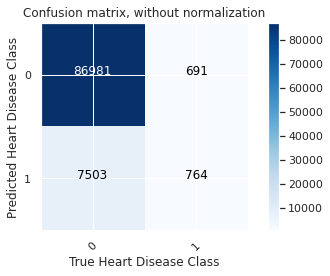

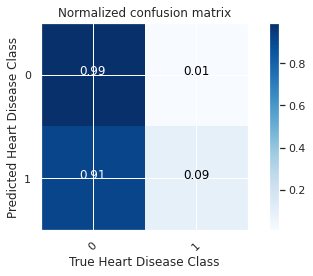

In [22]:
#Without Normalization
plt.figure()
plot_confusion_matrix(cnf_mat, classes=[0,1],
                      title='Confusion matrix, without normalization')
# With normalization
plt.figure()
plot_confusion_matrix(cnf_mat, classes= [0,1], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Without Normalization: actual numbers
* Out of true labels, person doesn't have heart disease i.e 86981+691, 86981 we have corectly predicted that person doesn't have heart disease
* 7503 of persons actually have heart disease, but we correctly predicted for 764 people having heart disease

#### Hyperparameter Tuning

*tempering the data prior to building the model that changes the accuracy of the base model(model with default values)*

In [23]:
df_htune = df[['HeartDisease','BMI', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'Diabetic', 'SleepTime', 'Asthma', 'KidneyDisease']]

In [24]:
# Preprocessing for numerical data
numerical_features = ['BMI','PhysicalHealth', 'MentalHealth', 'SleepTime']
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), #replace/impute the blank values with the mean
    ('scaler', StandardScaler())])

# Preprocessing for categorical data
categorical_features = ['AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory', 'Diabetic', 'Asthma', 'KidneyDisease'] 
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse = True))])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Append classifier to preprocessing pipeline
# Now we have a full prediction pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', LogisticRegression())])


In [25]:
#Splitting the dataset into training and test dataset
x_train, x_test, y_train, y_test = train_test_split(df_htune.loc[:,"BMI":"KidneyDisease"],
                                                    df_htune["HeartDisease"],
                                                    test_size= 0.3,
                                                    random_state=21)
print(f"Shape of Input Training Dataset: {x_train.shape}")
print(f"Shape of Input Test Dataset: {x_test.shape}")
print(f"Shape of Target Training Dataset: {y_train.shape}")
print(f"Shape of Target Test Dataset: {y_test.shape}")

Shape of Input Training Dataset: (223856, 12)
Shape of Input Test Dataset: (95939, 12)
Shape of Target Training Dataset: (223856,)
Shape of Target Test Dataset: (95939,)


In [26]:
clf.fit(x_train,y_train)
print(f"Logistic Regression Model's Score is : {clf.score(x_test,y_test):0.4f}")

Logistic Regression Model's Score is : 0.9155


#### Applying Hyperparameter grid for tuningof the model

In [27]:
param_grid = {
    'preprocessor__num__imputer__strategy' : ['mean','median'],
    #'model__penalty' : ['l1','l2','elasticnet','none'],
    'model__solver': ['newton-cg','lbfgs','liblinear'],
    'model__max_iter': [90,150,250]
}

grid_search = GridSearchCV(clf, param_grid, cv=5, verbose = 1,n_jobs= -1)
#cv : k Fold Cross Validation: No. of times the data needs to be split into training & test data and get 
#multiple models(trained on different patterns) and chose the model with better accuracy

# Preprocessing of training data, fit model 
grid_search.fit(x_train, y_train)

# Preprocessing of test data, get predictions
preds_test = grid_search.predict(x_test)

print(f'Score: {grid_search.score(x_test,y_test)}')

# Print your best combination of hyper parameters
print("Optimum setting of hyperparameters:................")

grid_search.best_params_

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Score: 0.9154566964425311
Optimum setting of hyperparameters:................


{'model__max_iter': 90,
 'model__solver': 'newton-cg',
 'preprocessor__num__imputer__strategy': 'mean'}

In [28]:
#save model in binary format and load/restore model from local system
joblib.dump(grid_search,"Logistic_Regression.md")

['Logistic_Regression.md']

*Confusion Matrix to evaluate the accuracy of a classification after HYPERPARAMETER TUNING*

In [29]:
model_test = joblib.load('Logistic_Regression.md')

In [30]:
y_prediction = model_test.predict(x_test)
y_prediction[51:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [31]:
#Confusion Matrix to evaluate the accuracy of a classification
cnf_mat = confusion_matrix(y_test,y_prediction)
cnf_mat

array([[87124,   620],
       [ 7491,   704]])

In [32]:
def plot_confusion_matrix(cm,classes, 
                          normalize = False,
                          title = "Confusion Matrix",
                          cmap = plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion Matrix, without Normalization")  

    print(cm)  
#show data as image using plt.imshow
    plt.imshow(cm,interpolation='nearest',cmap = cmap)
    plt.title(title)
    plt.colorbar()
#ARANGE : returns evenly spaced values from the given interval 
# and the advantage of numpy.arange() over the normal in-built range() function is that it allows us to generate sequences of numbers that are not integers  
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation = 45)
    plt.yticks(tick_marks,classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max()/2.
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,format(cm[i,j],fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i,j] > thresh else 'black')
    
    plt.xlabel('True Heart Disease Class')
    plt.ylabel('Predicted Heart Disease Class')
    plt.tight_layout()

Confusion Matrix, without Normalization
[[87124   620]
 [ 7491   704]]
Normalized Confusion Matrix
[[0.99293399 0.00706601]
 [0.91409396 0.08590604]]


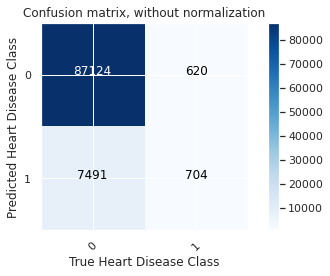

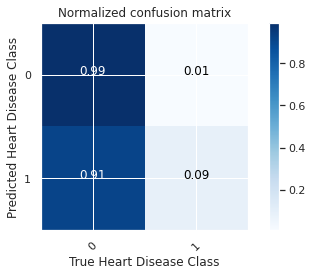

In [33]:
#Without Normalization
plt.figure()
plot_confusion_matrix(cnf_mat, classes=[0,1],
                      title='Confusion matrix, without normalization')
# With normalization
plt.figure()
plot_confusion_matrix(cnf_mat, classes= [0,1], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [24]:
joblib.dump(model,'logistics_reg.sav')

['logistics_reg.sav']

In [30]:
model.predict([[1.7738265211955795,
 0.0,
 0.0,
 -0.4240697781977096,
 -0.3643350061501532,
 0.0,
 1.0,
 1.0,
 0.0,
 0.6287759634342442,
 0.0,
 0.0]])

C:\Users\sasikumar\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

## RandomForestClassifier

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
 # create regressor object
regressor = RandomForestClassifier(n_estimators = 100, random_state = 0)

In [64]:
# fit the regressor with x and y data
regressor.fit(x_train, y_train) 

RandomForestClassifier(random_state=0)

In [65]:
regressor.score(x_test,y_test)

0.8972159392947602

In [66]:
y_predict_data = regressor.predict(x_test)

*Classes are highly lopsided towards one category, even after Hyperparameter tuning we could not find appropriate answer*

In [67]:
#Confusion Matrix to evaluate the accuracy of a classification
cnf_mat = confusion_matrix(y_test,y_predict_data)
cnf_mat

array([[85005,  2667],
       [ 7194,  1073]], dtype=int64)

In [68]:
y_predict_data

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [83]:
joblib.dump(regressor,'RandomForestClassifier.sav')

['RandomForestClassifier.sav']

## KNN

In [47]:

# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier

In [49]:
knn = KNeighborsClassifier(n_neighbors=7)
 
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [50]:
knn.score(x_test,y_test)

0.9090151033469184

In [51]:
y_predict_data = knn.predict(x_test)

In [53]:
#Confusion Matrix to evaluate the accuracy of a classification
cnf_mat = confusion_matrix(y_test,y_predict_data)
cnf_mat

array([[86572,  1100],
       [ 7629,   638]], dtype=int64)

In [84]:
joblib.dump(knn,'knn_cls.sav')

['knn_cls.sav']

## Navie Baye's

In [75]:
# training the model on training set
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
 
# making predictions on the testing set
y_predict_data = gnb.predict(x_test)
 

In [76]:
gnb.score(x_test,y_test)

0.8509052627190193

In [77]:
#Confusion Matrix to evaluate the accuracy of a classification
cnf_mat = confusion_matrix(y_test,y_predict_data)
cnf_mat

array([[78078,  9594],
       [ 4710,  3557]], dtype=int64)

In [85]:
joblib.dump(gnb,'nav_bys.sav')

['nav_bys.sav']

## Decision Tree

In [78]:
from sklearn.tree import DecisionTreeClassifier

In [80]:
clf_gini = DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=3, min_samples_leaf=5)

# Performing training
clf_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)

In [81]:
clf_gini.score(x_test,y_test)

0.9138306632339299

In [86]:
joblib.dump(clf_gini,'decision_tree.sav')

['decision_tree.sav']

In [87]:
x_train.iloc[0]

BMI                1.773827
AlcoholDrinking    0.000000
Stroke             0.000000
PhysicalHealth    -0.424070
MentalHealth      -0.364335
DiffWalking        0.000000
Sex                1.000000
AgeCategory        1.000000
Diabetic           0.000000
SleepTime          0.628776
Asthma             0.000000
KidneyDisease      0.000000
Name: 9491, dtype: float64

In [94]:
clm = df.select_dtypes(include=['object']).columns

In [95]:
for i in clm:
    print(df[i].value_counts())
    print()

No     187887
Yes    131908
Name: Smoking, dtype: int64

No     298018
Yes     21777
Name: AlcoholDrinking, dtype: int64

No     307726
Yes     12069
Name: Stroke, dtype: int64

No     275385
Yes     44410
Name: DiffWalking, dtype: int64

Female    167805
Male      151990
Name: Sex, dtype: int64

65-69          34151
60-64          33686
70-74          31065
55-59          29757
50-54          25382
80 or older    24153
45-49          21791
75-79          21482
18-24          21064
40-44          21006
35-39          20550
30-34          18753
25-29          16955
Name: AgeCategory, dtype: int64

White                             245212
Hispanic                           27446
Black                              22939
Other                              10928
Asian                               8068
American Indian/Alaskan Native      5202
Name: Race, dtype: int64

No                         269653
Yes                         40802
No, borderline diabetes      6781
Yes (during pregnancy)